In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/lnphng/Machine-Learning-with-Tree-Based-Models-in-Python/master/wbc.csv'
wbc = pd.read_csv(url)
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Classification

In [3]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# Import DecisionTreeClassifier from sklearn.tree
#from sklearn.tree import DecisionTreeClassifier
SEED=2
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6,random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
print('The first five predictions made by the fitted tree on the test set in the console')

# Import accuracy_score
#from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("\nTest set accuracy: {:.2f}".format(acc))
accstr = str(acc)
print('Using only two features, the tree was able to achieve an accuracy of', "{:.2f}".format(acc), '%!')


[1 0 1 1 0]
The first five predictions made by the fitted tree on the test set in the console

Test set accuracy: 0.85
Using only two features, the tree was able to achieve an accuracy of 0.85 %!


In [10]:
import mlxtend.plotting
def plot_labeled_decision_regions(X_test, y_test, clfs):

    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)

        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


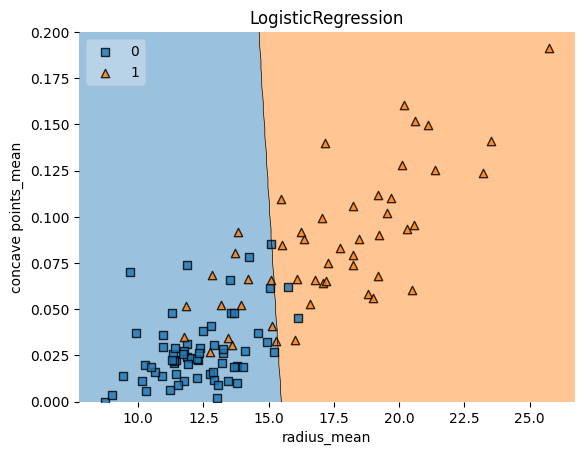

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


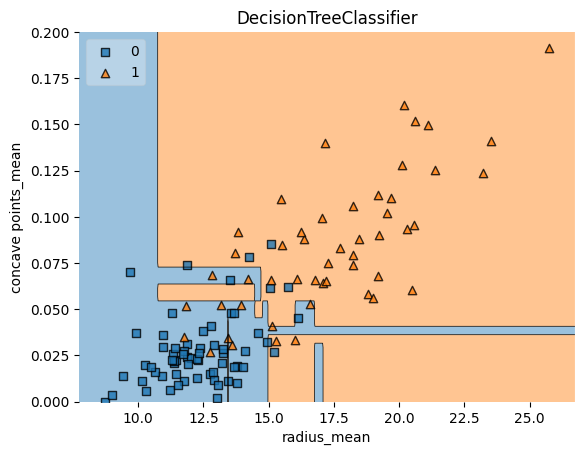

the decision boundary produced by logistic regression is linear
while the boundaries produced by the classification tree divide the feature space into rectangular regions


In [11]:
# Import LogisticRegression from sklearn.linear_model
#from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(solver = 'liblinear', random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

print('the decision boundary produced by logistic regression is linear\
\nwhile the boundaries produced by the classification tree divide the feature space into rectangular regions')

In [12]:
# Import DecisionTreeClassifier from sklearn.tree
#from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier( max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [13]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [14]:
# Import accuracy_score from sklearn.metrics
#from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
print('gini is default to use when criterion not mentioned')

Accuracy achieved by using entropy:  0.868421052631579
Accuracy achieved by using the gini index:  0.8333333333333334
gini is default to use when criterion not mentioned
